In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from IPython.display import Image, display
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

## Loading the Dataset

In [2]:
# Path to your Alphabet dataset
dataset_path = '/kaggle/input/synthetic-asl-alphabet/Train_Alphabet'

# Get the list of all folders (A-Z and Blank)
folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

# Initialize a list to hold the dataset information
data = []

# Loop through each folder and gather the image paths and their labels
for folder in folders:
    # Get the full path to the folder
    folder_path = os.path.join(dataset_path, folder)
    
    # Get all image files in the folder
    images = glob(os.path.join(folder_path, '*.png'))  # Adjust the file extension if necessary
    
    # Add the image paths and labels to the dataset
    for image in images:
        data.append([image, folder])

# Create a DataFrame from the dataset
alphabet_df = pd.DataFrame(data, columns=['image_paths', 'labels'])

# Display the DataFrame
alphabet_df.head()

image_paths labels
0  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      N
1  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      N
2  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      N
3  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      N
4  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      N

In [3]:
alphabet_df.shape

(24300, 2)

In [4]:
alphabet_df[alphabet_df['labels'] == 'A'].iloc[0]['image_paths']

'/kaggle/input/synthetic-asl-alphabet/Train_Alphabet/A/7bf0f4b5-cd37-4e38-959a-15f9822adb3c.rgb_0000.png'

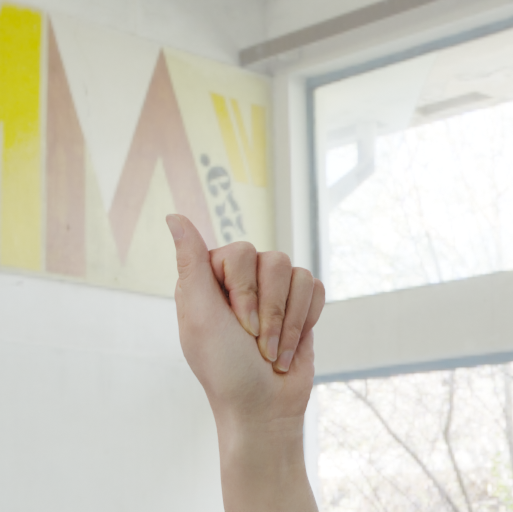

In [5]:
# Path to the image
image_path = '/kaggle/input/synthetic-asl-alphabet/Train_Alphabet/A/7bf0f4b5-cd37-4e38-959a-15f9822adb3c.rgb_0000.png'

# Display the image
display(Image(filename=image_path, width=300, height=300))

In [6]:
# Path to your Numbers dataset
dataset_path = '/kaggle/input/synthetic-asl-numbers/Train_Nums'

# Get the list of all folders (A-Z and Blank)
folders = [f for f in os.listdir(dataset_path) if (os.path.isdir(os.path.join(dataset_path, f)) and f!='Blank')]

# Initialize a list to hold the dataset information
data = []

# Loop through each folder and gather the image paths and their labels
for folder in folders:
    # Get the full path to the folder
    folder_path = os.path.join(dataset_path, folder)
    
    # Get all image files in the folder
    images = glob(os.path.join(folder_path, '*.png'))  # Adjust the file extension if necessary
    
    # Add the image paths and labels to the dataset
    for image in images:
        data.append([image, folder])

# Create a DataFrame from the dataset
numbers_df = pd.DataFrame(data, columns=['image_paths', 'labels'])

# Display the DataFrame
numbers_df.head()

image_paths labels
0  /kaggle/input/synthetic-asl-numbers/Train_Nums...      7
1  /kaggle/input/synthetic-asl-numbers/Train_Nums...      7
2  /kaggle/input/synthetic-asl-numbers/Train_Nums...      7
3  /kaggle/input/synthetic-asl-numbers/Train_Nums...      7
4  /kaggle/input/synthetic-asl-numbers/Train_Nums...      7

In [7]:
numbers_df.shape

(9000, 2)

In [8]:
numbers_df['labels'].unique()

array(['7', '2', '10', '5', '8', '3', '1', '4', '9', '6'], dtype=object)

In [9]:
numbers_df[numbers_df['labels'] == '7'].iloc[0]['image_paths']

'/kaggle/input/synthetic-asl-numbers/Train_Nums/7/00ea5220-f6da-403f-8be8-ad1cfcadef35.rgb_0000.png'

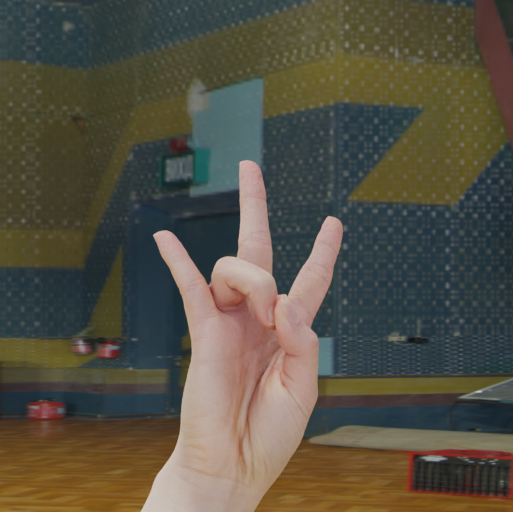

In [10]:
# Path to the image
image_path = '/kaggle/input/synthetic-asl-numbers/Train_Nums/7/009b070e-0f40-49c3-89f9-95036e6628d2.rgb_0000.png'

# Display the image
display(Image(filename=image_path, width=300, height=300))

In [11]:
combined_df = pd.concat([alphabet_df, numbers_df], ignore_index=True)

# Shuffle the combined DataFrame
combined_df = shuffle(combined_df).reset_index(drop=True)

# Display the first few rows of the combined DataFrame
combined_df.head()

image_paths labels
0  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      I
1  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      W
2  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      Z
3  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      N
4  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      P

In [12]:
combined_df.shape

(33300, 2)

In [13]:
combined_df['labels'].unique()

array(['I', 'W', 'Z', 'N', 'P', 'C', 'B', 'G', 'E', 'A', 'V', '4', 'X',
       'Q', '6', 'H', 'K', 'T', '7', 'J', 'D', '10', 'Blank', 'L', 'R',
       '2', 'Y', 'S', 'U', 'M', '3', '5', 'O', 'F', '9', '1', '8'],
      dtype=object)

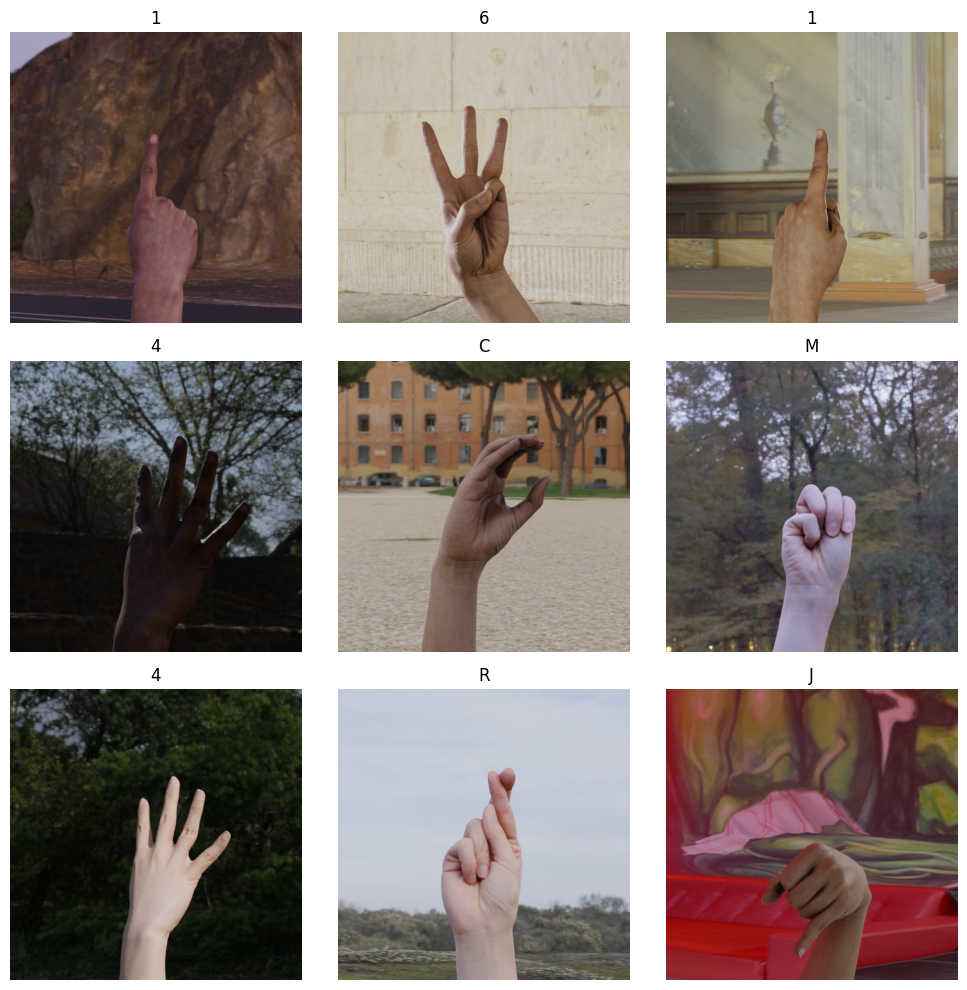

In [14]:
# Randomly sample 9 rows
sampled_df = combined_df.sample(n=9).reset_index(drop=True)

# Create a 3x3 grid to display the images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    # Get the image path and label for the current row
    image_path = sampled_df.loc[i, 'image_paths']
    label = sampled_df.loc[i, 'labels']
    
    # Read and display the image
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.axis('off')  # Hide the axes
    ax.set_title(label)  # Set the title to the label

# Adjust layout
plt.tight_layout()
plt.show()


In [15]:
combined_df.head()

image_paths labels
0  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      I
1  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      W
2  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      Z
3  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      N
4  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      P

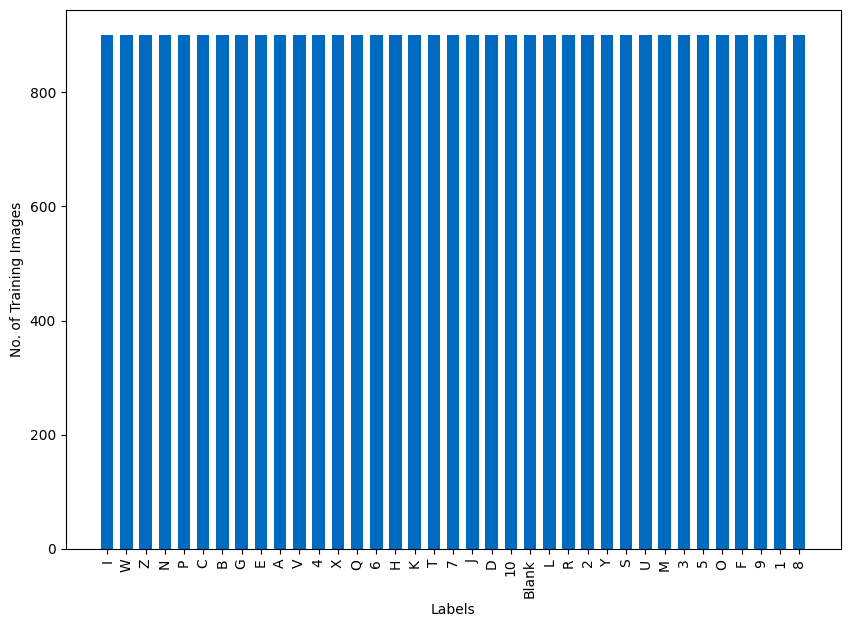

In [16]:
plt.figure(figsize=(10,7))

plt.bar(combined_df['labels'].unique().tolist(), combined_df['labels'].value_counts().tolist(), width=0.65, color='#0069c0')
plt.ylabel("No. of Training Images")
plt.xlabel("Labels")
plt.xticks(rotation="vertical")
plt.show()

## Splitting into Training and Validation dataset

In [17]:
train_df = pd.DataFrame(columns=combined_df.columns)
val_df = pd.DataFrame(columns=combined_df.columns)

train_dfs = []
val_dfs = []

for label in combined_df['labels'].unique():
    label_df = combined_df[combined_df['labels'] == label]
    label_df = label_df.sample(600)
    train_label_df, val_label_df = train_test_split(label_df, test_size=0.1, random_state=42)
    
    # Append to the lists
    train_dfs.append(train_label_df)
    val_dfs.append(val_label_df)

# Concatenate the lists to form the final training and validation DataFrames
train_df = pd.concat(train_dfs, ignore_index=True)
val_df = pd.concat(val_dfs, ignore_index=True)

# Display the number of images in each set to verify the split
print(f'Training set: {train_df.shape[0]} images')
print(f'Validation set: {val_df.shape[0]} images')

Training set: 19980 images
Validation set: 2220 images


In [18]:
train_df['labels'].value_counts()

labels
I        540
W        540
Z        540
N        540
P        540
C        540
B        540
G        540
E        540
A        540
V        540
4        540
X        540
Q        540
6        540
H        540
K        540
T        540
7        540
J        540
D        540
10       540
Blank    540
L        540
R        540
2        540
Y        540
S        540
U        540
M        540
3        540
5        540
O        540
F        540
9        540
1        540
8        540
Name: count, dtype: int64

In [19]:
val_df['labels'].value_counts()

labels
I        60
W        60
Z        60
N        60
P        60
C        60
B        60
G        60
E        60
A        60
V        60
4        60
X        60
Q        60
6        60
H        60
K        60
T        60
7        60
J        60
D        60
10       60
Blank    60
L        60
R        60
2        60
Y        60
S        60
U        60
M        60
3        60
5        60
O        60
F        60
9        60
1        60
8        60
Name: count, dtype: int64

In [20]:
train_df = shuffle(train_df).reset_index(drop=True)
train_df

image_paths labels
0      /kaggle/input/synthetic-asl-alphabet/Train_Alp...      L
1      /kaggle/input/synthetic-asl-alphabet/Train_Alp...  Blank
2      /kaggle/input/synthetic-asl-alphabet/Train_Alp...      I
3      /kaggle/input/synthetic-asl-numbers/Train_Nums...     10
4      /kaggle/input/synthetic-asl-alphabet/Train_Alp...      U
...                                                  ...    ...
19975  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      X
19976  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      L
19977  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      A
19978  /kaggle/input/synthetic-asl-numbers/Train_Nums...      7
19979  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      F

[19980 rows x 2 columns]

In [21]:
val_df = shuffle(val_df).reset_index(drop=True)
val_df

image_paths labels
0     /kaggle/input/synthetic-asl-numbers/Train_Nums...      3
1     /kaggle/input/synthetic-asl-numbers/Train_Nums...      9
2     /kaggle/input/synthetic-asl-alphabet/Train_Alp...      J
3     /kaggle/input/synthetic-asl-numbers/Train_Nums...      4
4     /kaggle/input/synthetic-asl-numbers/Train_Nums...      8
...                                                 ...    ...
2215  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      N
2216  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      B
2217  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      R
2218  /kaggle/input/synthetic-asl-numbers/Train_Nums...      9
2219  /kaggle/input/synthetic-asl-alphabet/Train_Alp...      J

[2220 rows x 2 columns]

In [22]:
val_df.iloc[2]['image_paths']

'/kaggle/input/synthetic-asl-alphabet/Train_Alphabet/J/a2497c48-6560-42a1-b241-9dcfaf087b8a.rgb_0000.png'

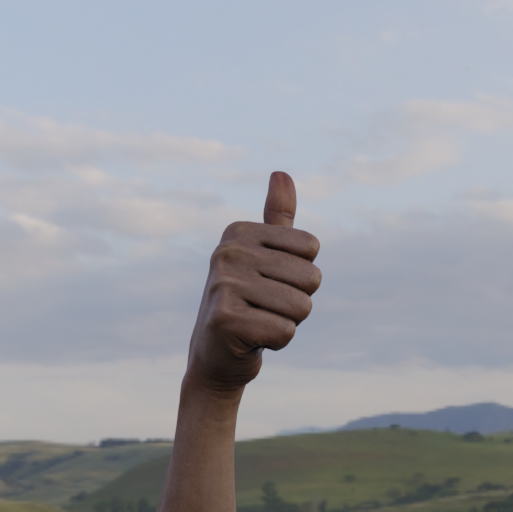

In [23]:
# Path to the image
image_path = '/kaggle/input/synthetic-asl-numbers/Train_Nums/10/4a8a0263-17a8-4013-b386-d6111d9d12a8.rgb_0000.png'

# Display the image
display(Image(filename=image_path, width=300, height=300))

## Data Augmentation and Preprocessing the data

In [24]:
# Image dimensions
IMG_HEIGHT = 128
IMG_WIDTH = 128

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,                
    rotation_range=40,             
    width_shift_range=0.2,         
    height_shift_range=0.2,        
    shear_range=0.2,               
    zoom_range=0.2,                
    horizontal_flip=True,         
    vertical_flip=False,           
    brightness_range=[0.8, 1.2]   
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_paths',
    y_col='labels',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_paths',
    y_col='labels',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical'
)

Found 19980 validated image filenames belonging to 37 classes.
Found 2220 validated image filenames belonging to 37 classes.


In [25]:
train_generator

In [26]:
len(train_generator)

625

## Building a CNN Model

In [27]:
model = Sequential([
    # Block 1
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Reduced dropout
    
    # Block 2
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Reduced dropout
    
    # Block 3
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
#     Conv2D(256, (3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),  # Reduced dropout
    
    # Global Average Pooling
    GlobalAveragePooling2D(),
    
    # Fully Connected Layers
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    # Output Layer
    Dense(37, activation='softmax')
])

# Compile the model with Adam optimizer and a reduced learning rate
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,955,941 (7.46 MB)

 Trainable params: 1,954,149 (7.45 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [28]:
log_dir = "/kaggle/working/logs/"  # Directory where TensorBoard logs will be saved
os.makedirs(log_dir, exist_ok=True)

In [29]:
tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,  # Frequency (in epochs) at which to compute activation and weight histograms
    write_graph=True,  # Whether to visualize the graph
    write_images=True  # Whether to visualize model weights
)

In [30]:
early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # The metric to monitor
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Whether to restore model weights from the epoch with the best value of the monitored metric
)

In [31]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,  
    patience=3,  
    min_lr=1e-6  
)

In [32]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


## Training the Model

In [33]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=35,
    callbacks=[tensorboard_callback, early_stopping_callback, reduce_lr]
)

Epoch 1/35


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1722943621.600400     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722943621.628541     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step - accuracy: 0.0310 - loss: 3.7383

W0000 00:00:1722944051.408553     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 511s 748ms/step - accuracy: 0.0310 - loss: 3.7382 - val_accuracy: 0.0374 - val_loss: 3.5968 - learning_rate: 1.0000e-04
Epoch 2/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 304s 481ms/step - accuracy: 0.0468 - loss: 3.5868 - val_accuracy: 0.0599 - val_loss: 3.5044 - learning_rate: 1.0000e-04
Epoch 3/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 302s 478ms/step - accuracy: 0.0528 - loss: 3.5300 - val_accuracy: 0.0676 - val_loss: 3.3931 - learning_rate: 1.0000e-04
Epoch 4/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 295s 467ms/step - accuracy: 0.0704 - loss: 3.4218 - val_accuracy: 0.1221 - val_loss: 3.1341 - learning_rate: 1.0000e-04
Epoch 5/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 298s 471ms/step - accuracy: 0.1053 - loss: 3.1374 - val_accuracy: 0.1680 - val_loss: 2.6899 - learning_rate: 1.0000e-04
Epoch 6/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 293s 464ms/step - accuracy: 0.1675 - loss: 2.7194 - val_accuracy: 0.2176 - val_loss: 2.3164 - learning_rate: 1.0000e-04
Epoch 7/35
625/625 ━━━━━━━━━━━━━━━━━━━━ 295s 467ms/

In [34]:
val_loss, val_acc = model.evaluate(val_generator, steps=val_generator.samples // val_generator.batch_size)

print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_acc}')

69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - accuracy: 0.9800 - loss: 0.0538
Validation loss: 0.06358028203248978
Validation accuracy: 0.97826087474823


### Visualizing the Training and Validation Accuracy and Loss 

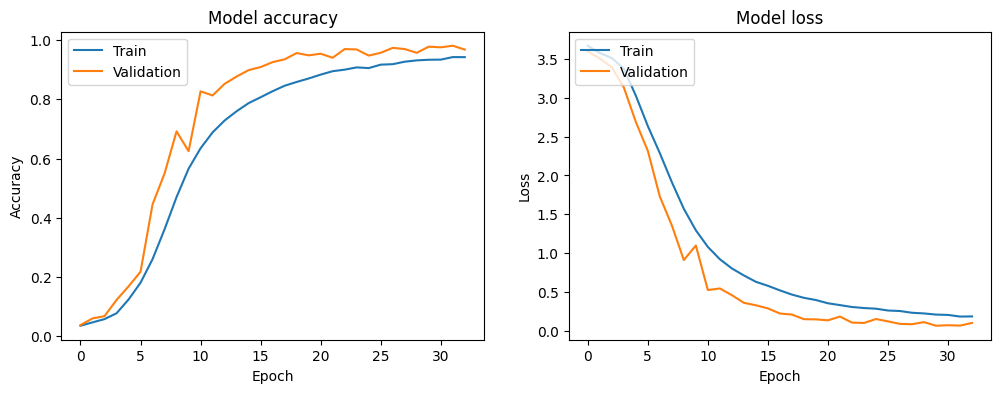

In [35]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [36]:
%load_ext tensorboard
%tensorboard --logdir /kaggle/working/logs/fit --port=6006

## Testing on Test dataset

In [37]:
# Path to your Test Alphabet dataset
dataset_path = '/kaggle/input/synthetic-asl-alphabet/Test_Alphabet'

# Get the list of all folders (A-Z and Blank)
folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

# Initialize a list to hold the dataset information
data = []

# Loop through each folder and gather the image paths and their labels
for folder in folders:
    # Get the full path to the folder
    folder_path = os.path.join(dataset_path, folder)
    
    # Get all image files in the folder
    images = glob(os.path.join(folder_path, '*.png'))  # Adjust the file extension if necessary
    
    # Add the image paths and labels to the dataset
    for image in images:
        data.append([image, folder])

# Create a DataFrame from the dataset
test_alphabet_df = pd.DataFrame(data, columns=['image_paths', 'labels'])

# Display the DataFrame
test_alphabet_df.head()

image_paths labels
0  /kaggle/input/synthetic-asl-alphabet/Test_Alph...      N
1  /kaggle/input/synthetic-asl-alphabet/Test_Alph...      N
2  /kaggle/input/synthetic-asl-alphabet/Test_Alph...      N
3  /kaggle/input/synthetic-asl-alphabet/Test_Alph...      N
4  /kaggle/input/synthetic-asl-alphabet/Test_Alph...      N

In [38]:
# Path to your Test Numbers dataset
dataset_path = '/kaggle/input/synthetic-asl-numbers/Test_Nums'

# Get the list of all folders (A-Z and Blank)
folders = [f for f in os.listdir(dataset_path) if (os.path.isdir(os.path.join(dataset_path, f)) and f!='Blank')]

# Initialize a list to hold the dataset information
data = []

# Loop through each folder and gather the image paths and their labels
for folder in folders:
    # Get the full path to the folder
    folder_path = os.path.join(dataset_path, folder)
    
    # Get all image files in the folder
    images = glob(os.path.join(folder_path, '*.png'))  # Adjust the file extension if necessary
    
    # Add the image paths and labels to the dataset
    for image in images:
        data.append([image, folder])

# Create a DataFrame from the dataset
test_numbers_df = pd.DataFrame(data, columns=['image_paths', 'labels'])

# Display the DataFrame
test_numbers_df.head()

image_paths labels
0  /kaggle/input/synthetic-asl-numbers/Test_Nums/...      7
1  /kaggle/input/synthetic-asl-numbers/Test_Nums/...      7
2  /kaggle/input/synthetic-asl-numbers/Test_Nums/...      7
3  /kaggle/input/synthetic-asl-numbers/Test_Nums/...      7
4  /kaggle/input/synthetic-asl-numbers/Test_Nums/...      7

In [39]:
test_combined_df = pd.concat([test_alphabet_df, test_numbers_df], ignore_index=True)

# Shuffle the combined DataFrame
test_combined_df = shuffle(test_combined_df).reset_index(drop=True)

# Display the first few rows of the combined DataFrame
test_combined_df.head()

image_paths labels
0  /kaggle/input/synthetic-asl-alphabet/Test_Alph...      U
1  /kaggle/input/synthetic-asl-alphabet/Test_Alph...      N
2  /kaggle/input/synthetic-asl-alphabet/Test_Alph...      L
3  /kaggle/input/synthetic-asl-numbers/Test_Nums/...      9
4  /kaggle/input/synthetic-asl-numbers/Test_Nums/...      9

In [40]:
test_combined_df.shape

(3700, 2)

In [41]:
test_combined_df['labels'].unique()

array(['U', 'N', 'L', '9', 'I', 'P', '1', '10', 'M', '7', '6', 'Z', 'K',
       'O', '5', 'B', 'S', 'A', 'C', 'J', 'Q', 'G', 'X', 'Y', '8',
       'Blank', '2', 'W', '3', 'T', 'H', 'R', 'D', 'E', 'V', '4', 'F'],
      dtype=object)

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_combined_df,  # Your test dataframe
    x_col='image_paths',  # Column with image file paths
    y_col='labels',       # Column with labels
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images to match model input
    batch_size=32,        # Batch size
    class_mode='categorical',  # Class mode for multi-class classification
    shuffle=False  # Important to not shuffle for evaluation
)

Found 3700 validated image filenames belonging to 37 classes.


In [43]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 70s 603ms/step - accuracy: 0.9752 - loss: 0.0742
Test Loss: 0.07141100615262985
Test Accuracy: 0.9756757020950317


W0000 00:00:1722953944.043817     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [46]:
# Get class indices from the training generator
class_indices = train_generator.class_indices

# Create a reverse mapping (index to label)
index_to_label = {v: k for k, v in class_indices.items()}
index_to_label

{0: '1',
 1: '10',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'Blank',
 13: 'C',
 14: 'D',
 15: 'E',
 16: 'F',
 17: 'G',
 18: 'H',
 19: 'I',
 20: 'J',
 21: 'K',
 22: 'L',
 23: 'M',
 24: 'N',
 25: 'O',
 26: 'P',
 27: 'Q',
 28: 'R',
 29: 'S',
 30: 'T',
 31: 'U',
 32: 'V',
 33: 'W',
 34: 'X',
 35: 'Y',
 36: 'Z'}

## Saving the Model

In [47]:
model.save("ASL_CNN_model.h5")

## Testing on Multiple Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


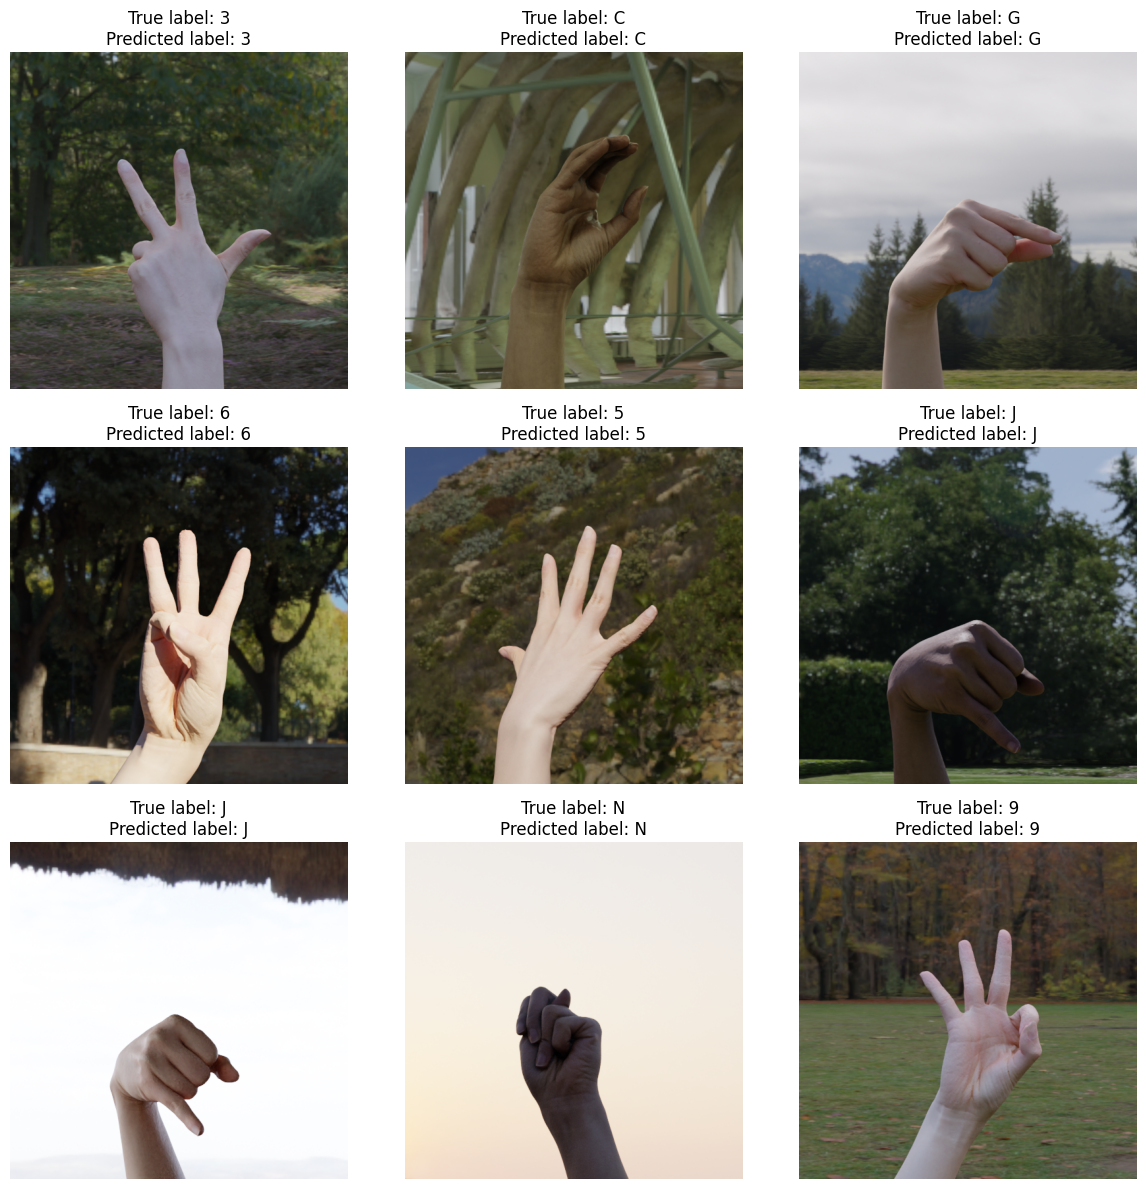

In [50]:
# Load the saved model
model = load_model("ASL_CNN_model.h5")

image_paths = test_combined_df['image_paths'].sample(9).tolist()

true_labels = [test_combined_df['labels'][test_combined_df['image_paths'] == image_path].values[0] for image_path in image_paths]

# Create a 3x3 grid for displaying images and predictions
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Loop through each image path
for i, ax in enumerate(axes.flat):
    image_path = image_paths[i]
    true_label = true_labels[i]
    
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize if needed

    # Make predictions
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions[0])  # Get the index with the highest probability

    # Map index to label
    predicted_label = index_to_label[predicted_index]

    # Display the image and prediction
    original_image = plt.imread(image_path)
    ax.imshow(original_image)
    ax.axis('off')  # Hide the axis
    ax.set_title(f"True label: {true_label}\nPredicted label: {predicted_label}")

# Adjust layout
plt.tight_layout()
plt.show()


In [51]:
import pickle

with open("label_list.pkl","wb") as f:
    pickle.dump(index_to_label, f)